This is a machine Learning Project about group customers of malls based on their purchase history. We are deploying K-means clustering alogrithm for this. And This is an end to end Machine Learning delopyment.

In [20]:
#Install Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import joblib

In [21]:
#Loading the Dataset
df= pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
#Data Cleaning

#check for missing values
print(df.isnull().sum())

df =df.drop_duplicates()

#drop missing values(if any)
df.dropna(subset =['Spending Score (1-100)'], inplace=True)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [23]:
#Handling Categorical values
df = pd.get_dummies(df, columns=['Gender'])

In [24]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   Gender_Female           200 non-null    bool 
 5   Gender_Male             200 non-null    bool 
dtypes: bool(2), int64(4)
memory usage: 6.8 KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34

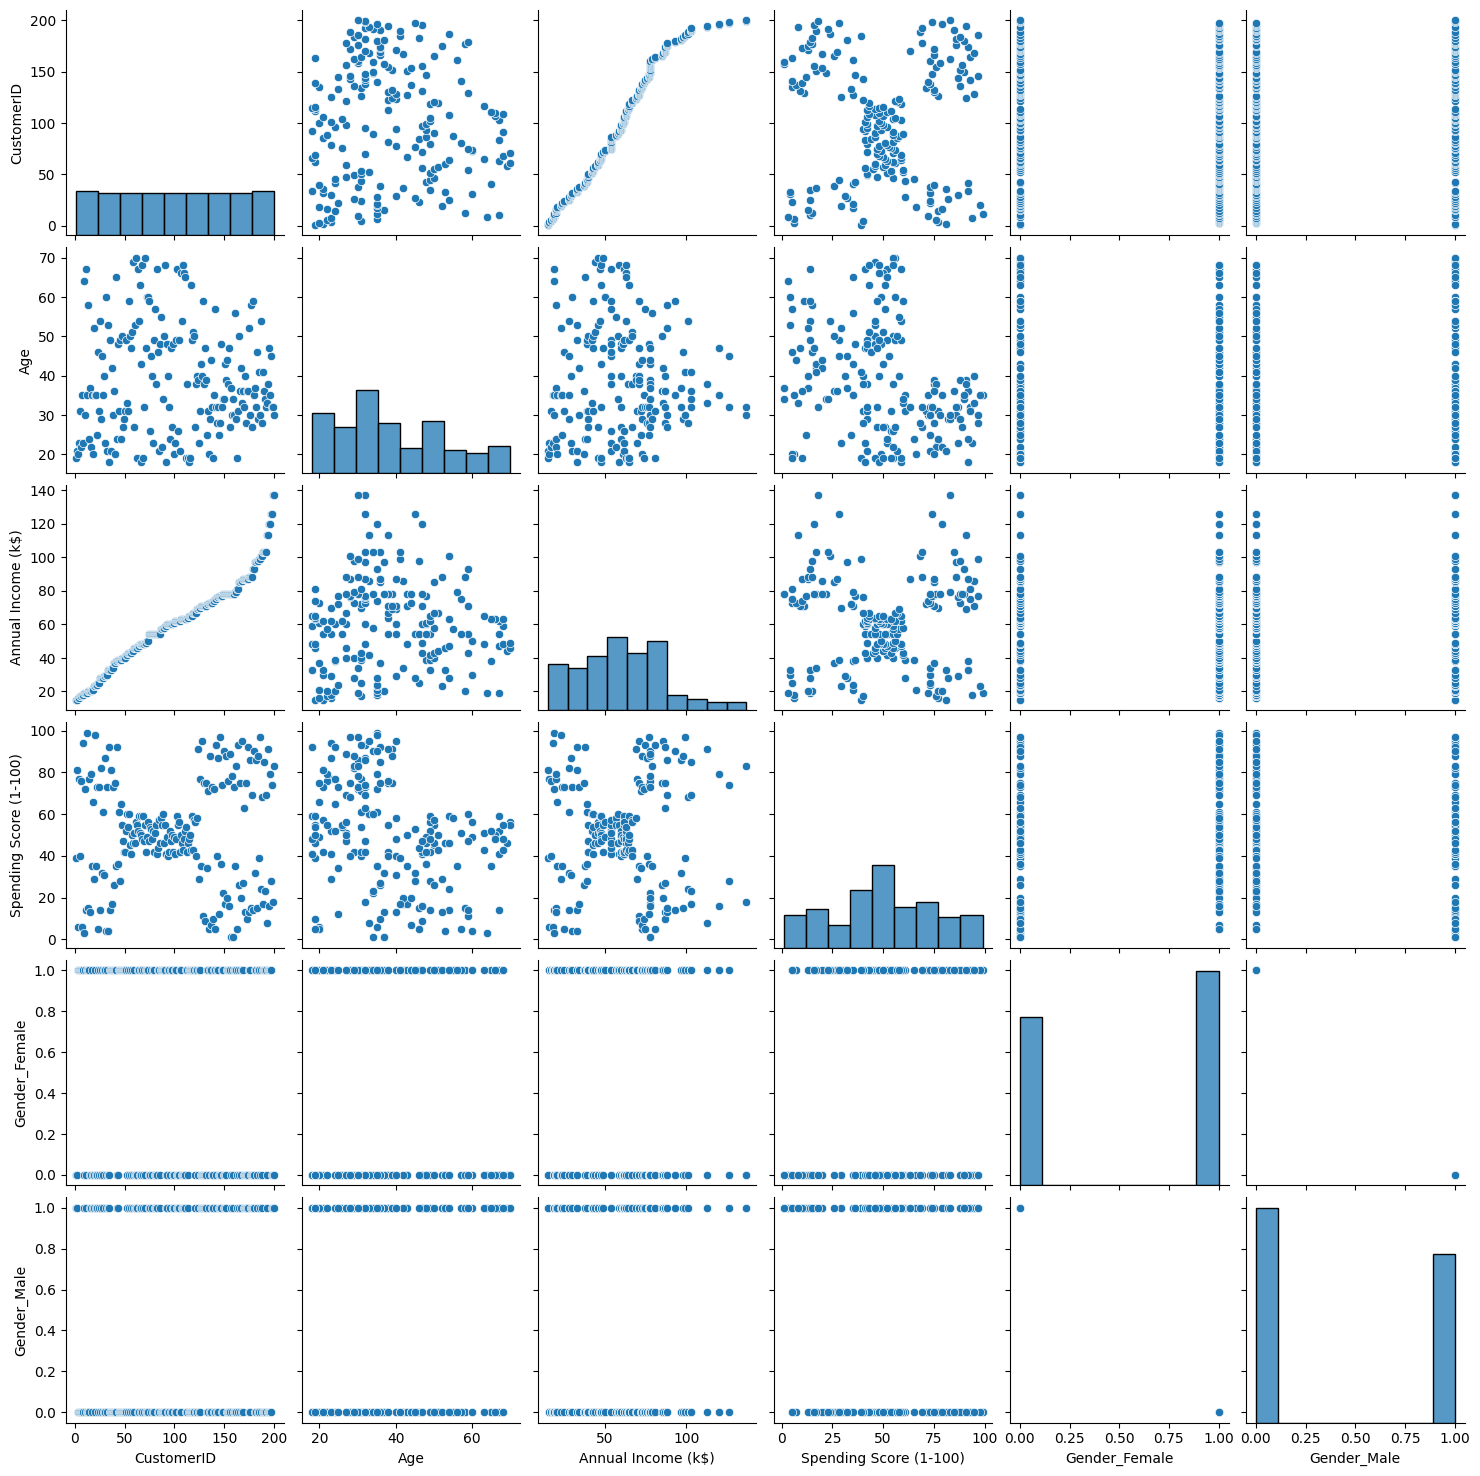

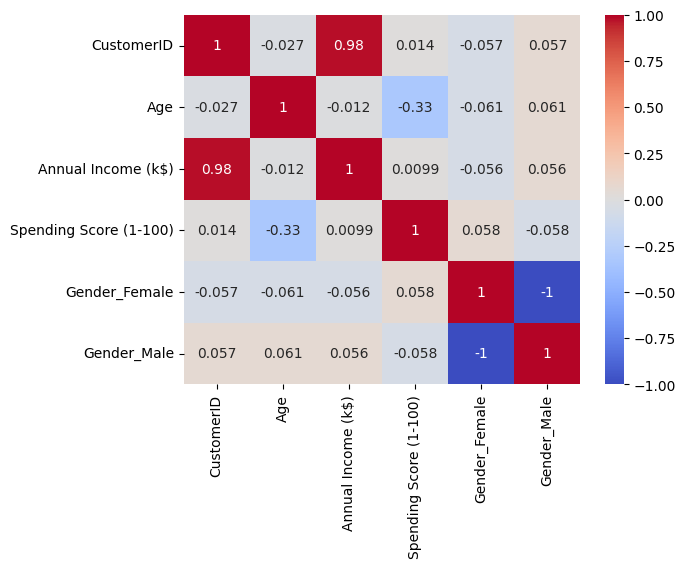

In [25]:
#EDA(Exploratory Data Analysis)
print(df.info())
print(df.describe())

#Visualizing disturbution of numeric columns
sns.pairplot(df)
plt.show()

#Check correlation between numeric features
sns.heatmap(df.corr(), annot =True, cmap='coolwarm')
plt.show()



In [26]:
#Feature Selection and Scaling

#Assume we are working with a subset of numerical features, for example, 'Annual Income' and 'Spending Score'
numerical_features =df[['Annual Income (k$)','Spending Score (1-100)']]

#Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

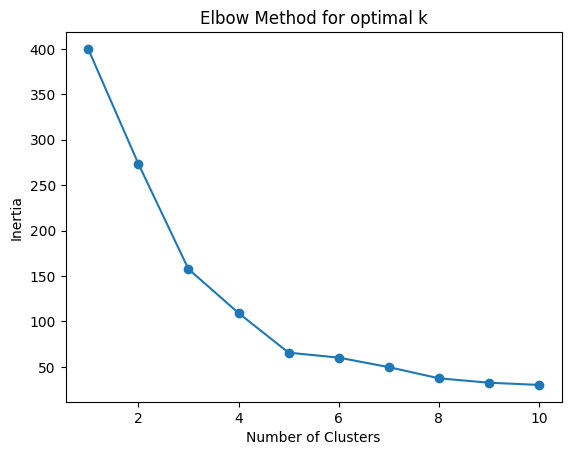

In [27]:
#Find the Optimal Number of Clusters(k)
#Elbow Method
inertia = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(scaled_features)
  inertia.append(kmeans.inertia_)

#Plot the Elbow Graph
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for optimal k')
plt.show()

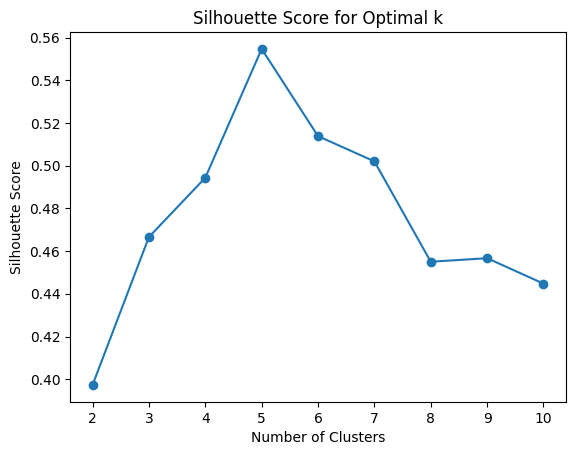

In [28]:
#Silhouette Score:

sil_scores = []
#Starting from 2 because silhouette score is undefined for 1 cluster
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_features)
  sil_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.plot(range(2,11), sil_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [35]:
#Train the K-means Model
#Assuming the optimal k is 5 based on the above methods
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

#Add Cluster labels to the data
df['Cluster'] = kmeans.labels_

#Check the clusters
print(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())
df['Annual Income (k$)'].dtypes

   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        4
1                  15                      81        2
2                  16                       6        4
3                  16                      77        2
4                  17                      40        4


dtype('int64')

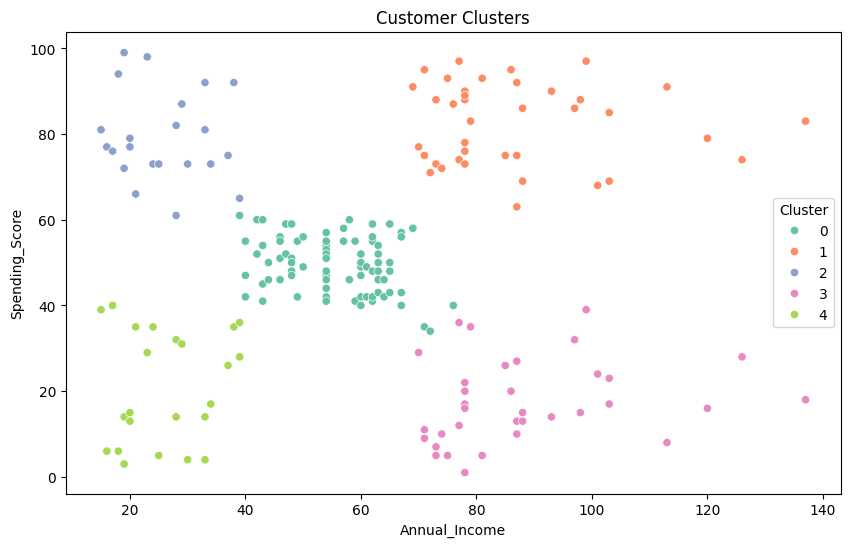

In [38]:
# Rename columns for easier plotting
df.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

# Visualizing the Clusters

#Plotting the cluster
plt.figure(figsize=(10,6))
# Use the simplified column names for plotting
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Cluster', palette='Set2')
plt.title('Customer Clusters')
plt.show()

In [39]:
#Evaluating the model

silhouette = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score: {silhouette}')

Silhouette Score: 0.5546571631111091


In [40]:
#saving and Loading the model
joblib.dump(kmeans, 'customer_segmentation_kmeans_model.pkl')

#Save the Scaler(important to use some scaler for future data)
joblib.dump(scaler, 'scaler.pkl')

#Load the Model
laoded_kmeans = joblib.load('customer_segmentation_kmeans_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

In [42]:
#Making Predictions with the Model
new_data = pd.DataFrame({
    'Annual Income (k$)': [60],
    'Spending Score (1-100)': [80]
})
scaled_new_data = loaded_scaler.transform(new_data)
predicted_cluster = laoded_kmeans.predict(scaled_new_data)
print(f'Predicted Cluster: {predicted_cluster[0]}')

Predicted Cluster: 1
